# Compare Henry's Constant

After my Zoom meeting with Julie on July 8, 2020, I realized that the clearest way to show the quantitative effect of molecular weight, functionality, or hydroxyl concentration on the solubility was to plot Henry's constant as a function of the desired variable. This notebook contains such plots.

### Henry's Constant

Henry's law states that the solubility of a gas in a liquid increases linearly with pressure at low pressures. This linear relationship is governed by the constant known as Henry's constant, given by the equation

\begin{align*}
    c &= H p\\
\end{align*}

where $c$ is the concentration of the gas in the liquid in $mol/m^3$, $p$ is the pressure in Pa, and $H$ is Henry's constant in $mol/(m^3\,Pa)$. To compute Henry's constant, I will first need to compute the concentration of $CO_2$ in the polyol in terms of moles per volume.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import dataproc
import plot

from importlib import reload

reload(dataproc)
reload(plot)

# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../g-adsa_results/'
# csv data files
csv_file_list = ['gui_62-2f_15c', 'gui_62-2f_25c', 'gui_62-2f_35c', 'gui_62-2f_45c',
                 'gui_76-2f_15c', 'gui_76-2f_25c', 'gui_76-2f_35c', 'gui_76-2f_45c',
                 'aioni_1500-2f_50c', 'aioni_4000-2f_50c', 
                 'mg_92-3f_40c', 'mg_92-3f_60c', 'mg_92-3f_80c', 'mg_92-3f_100c', 
                 'li_150-2f_30c', 'li_150-2f_40c', 'li_150-2f_50c', 'li_150-2f_60c',
                  'li_200-2f_30c', 'li_200-2f_40c', 'li_200-2f_50c', 'li_200-2f_60c',
                  'li_300-2f_30c', 'li_300-2f_40c', 'li_300-2f_50c', 'li_300-2f_60c',
                  'li_400-2f_30c', 'li_400-2f_40c', 'li_400-2f_50c', 'li_400-2f_60c',
                '1k2f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c', '3k2f_31c', '3k2f_60c_lop',
                'p1_800-5f_35c', 'p1_800-5f_50c', 'p2_500-4f_35c', 'p2_500-4f_50c', 'p3_1k3f_35c', 'p4_450-3f_35c',
                 'p5_255-3f_35c', #'p6_1k2f_35c', 'p7_356-2f_35c',
#                 'danesh_400-2f_40c', 'danesh_400-2f_50c','danesh_600-2f_40c', 
#                 'danesh_600-2f_50c', 'danesh_1000-2f_50c', 
                 'dow_1000-5f_25c', 'dow_1000-5f_60c', 'dow_4000-2f_25c', # actually 26c
                 'wiesmet_1500-2f_65c', 'wiesmet_1500-2f_80c', 'wiesmet_1500-2f_100c',
                 'wiesmet_4000-2f_55c', 'wiesmet_4000-2f_60c', 'wiesmet_4000-2f_80c',
                 'wiesmet_4000-2f_100c', 'wiesmet_8000-2f_80c',
                'jou_150-2f_25c', 'jou_150-2f_50c', 'jou_150-2f_70c', 'jou_150-2f_100c',
                'jou_150-2f_120c',
                'gourg_200-2f_40c', 'gourg_200-2f_60c', 'gourg_200-2f_75c',
                'gourg_400-2f_40c', 'gourg_400-2f_60c', 'gourg_400-2f_75c',
                'gourg_600-2f_40c', 'gourg_600-2f_60c', 'gourg_600-2f_75c',]
               # 'flichy_2700-2f_25c', 'flichy_2700-2f_35c']
                 #, 'nunes_92-3f_80c', 'nunes_92-3f_120c', 'nunes_92-3f_150c', ]
# creates colormap
cmap = cm.get_cmap('jet')
# defines markers of each series
d_marker = {'gui_62-2f': 'v', 'gui_76-2f':'^', 'mg_92-3f': 's', '1k2f':'o', '1k3f':'^', '3k2f':'*', 'p1_800-5f':'h',
            'p2_500-4f':'+', 'p3_1k3f':'^', 'p4_450-3f':'p', 'p5_255-3f':'d', 'p6_1k2f':'o', 'p7_356-2f':'p', 'aioni_1500-2f': 'o',
           'aioni_4000-2f':'<', 'li_150-2f':'1', 'li_200-2f':'2', 'li_300-2f':'3', 'li_400-2f':'4', 'danesh_400-2f':'>',
           'danesh_600-2f':'<', 'danesh_1000-2f':'o', 'dow_1000-5f':'h', 'dow_4000-2f':'<', 'wiesmet_1500-2f':'o',
           'wiesmet_4000-2f':'<', 'wiesmet_8000-2f':'*', 'jou_150-2f': 's', 'gourg_200-2f':'s', 'gourg_400-2f':'>',
           'gourg_600-2f':'<', 'flichy_2700-2f':'*'}

d_fill = {'p6_1k2f':'bottom', 'aioni_1500-2f':'full', 'aioni_1500-2f':'full', 'p1_800-5f':'full', 
          'p7_356-2f':'full', 'danesh_400-2f':'full', 'danesh_600-2f':'full', 'danesh_1000-2f':'top', 
          'dow_1000-5f':'full', 'wiesmet_1500-2f':'top', 'wiesmet_4000-2f':'top', 'gourg_200-2f':'bottom',
         'gourg_400-2f':'bottom', 'gourg_600-2f':'bottom', 'flichy_2700-2f':'full', 'p3_1k3f':'full'}

Extract data from dataframes

In [2]:
d = dataproc.load_proc_data(csv_file_list, data_folder, adjust_T=False)

## Preprocess Henry's Constant Data

We preprocess Henry's constant data so that it can be plotted more easily with separate software. While the subsequent code will use the dictionary of data, the datasheet that is saved in the cell below will allow for plotting with different software in paper-quality plots.

In [3]:
reload(dataproc)
# sets threshold pressure for computing Henry's constant
p_thresh_ideal = 1000 # [kPa]
# save filename
save_name = 'henrys_constant_polyols.csv'

# creates list to store data
data = []
# loops through data
for tag in csv_file_list:
    # stores metadata
    pt = [d[tag]['polyol'], plot.get_mw(tag), plot.get_f(tag), d[tag]['T']]
    # computes Henry's constant and uncertainty
    # raises to the minimum pressure if it is higher than the prescribed ideal threshold 
    p_thresh = max(p_thresh_ideal, np.nanmin(d[tag]['p']))
    try:
        # increase threshold for pressure to 1000 kPa for fitting of Henry's constant
        
        print('pressure')
        print(d[tag]['p'])
        print('solubility')
        print(d[tag]['solub'])
        
        H, s_H = dataproc.compute_henrys_const(d[tag]['p'], 
                                               d[tag]['solub'], 
                                               d[tag]['spec_vol'], 
                                               p_thresh=p_thresh, 
                                              s_solub=d[tag]['s_solub'], 
                                              s_spec_vol=d[tag]['s_spec_vol'], 
                                              force_origin=True, 
                                              by_wt=True)
    except:
        print('Failed to compute Henry''s constant for {0:s}.'.format(tag))
    
    # stores Henry's constant data
    pt += [H, s_H]
    # stores data point in data list
    data += [pt]
    
# saves dataframe
df = pd.DataFrame(columns=['polyol', 'Mw [g/mol]', 'f [OH/molecule]', 'T [C]', 
                           'H [w/(w.Pa)]', 'uncertainty [w/(w.Pa)]'], data=np.array(data))
df.to_csv(data_folder + save_name, index=False)

pressure
[  94.2  218.3  435.5  617.5  918.8 1208.9 1672.8 1963.  2377.5 2694.1
 2931.6 3322.8]
solubility
[0.00163335 0.00383827 0.00761721 0.01076331 0.01607273 0.02118854
 0.02944729 0.03461892 0.04208654 0.04775373 0.05211364 0.05916597]
pressure
[ 171.2  361.2  722.8 1103.2 1531.6 1994.1 2437.5 2916.3 3367.2 3708.9
 4214.4]
solubility
[0.00255751 0.00540547 0.01083491 0.01650423 0.02299494 0.03002893
 0.03681062 0.04421791 0.05115167 0.05648882 0.06438797]
pressure
[ 241.7  570.8  936.7 1391.3 1743.5 2299.4 2653.1 2910.3 3372.2 3636.1
 3971.8 4242.9 4617.5 5035.4]
solubility
[0.00319773 0.0075458  0.01241108 0.0185199  0.02328421 0.03075637
 0.03556818 0.03907945 0.0453954  0.04900841 0.05366915 0.05738057
 0.06259512 0.06843128]
pressure
[ 146.1  455.5  821.3 1294.2 1610.3 2150.5 2478.1 2907.7 3256.4 3691.9
 4072.5 4403.6 4860.1 5299.6 5789.8]
solubility
[0.00170441 0.00533419 0.00961834 0.01521019 0.01895226 0.02538346
 0.02930192 0.03447294 0.03871323 0.04392371 0.04856544 0.05

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),


Computes and plots Henry's constant.

Henrys constant computation failed for gui_62-2f_15c
Henrys constant computation failed for gui_62-2f_25c
Henrys constant computation failed for gui_62-2f_35c
Henrys constant computation failed for gui_62-2f_45c
Henrys constant computation failed for gui_76-2f_15c
Henrys constant computation failed for gui_76-2f_25c
Henrys constant computation failed for gui_76-2f_35c
Henrys constant computation failed for gui_76-2f_45c
Henrys constant computation failed for aioni_1500-2f_50c
Henrys constant computation failed for aioni_4000-2f_50c
Henrys constant computation failed for li_150-2f_30c
Henrys constant computation failed for li_150-2f_40c
Henrys constant computation failed for li_150-2f_50c
Henrys constant computation failed for li_150-2f_60c
Henrys constant computation failed for li_200-2f_30c
Henrys constant computation failed for li_200-2f_40c
Henrys constant computation failed for li_200-2f_50c
Henrys constant computation failed for li_200-2f_60c
Henrys constant computation failed for

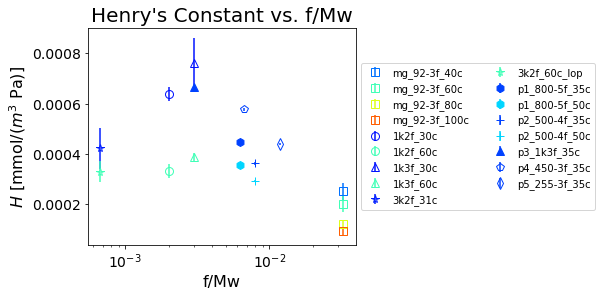

In [4]:
# computes and plots Henry's constant vs. functionality / molecular weight
ax = plot.henrys_const(d, csv_file_list, cmap, d_marker, save_path=data_folder + 'henrys_const_f_per_mw.pdf',
                                   d_fill=d_fill)

### Henry's Constant by Weight

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),


Text(0.5, 1.0, '')

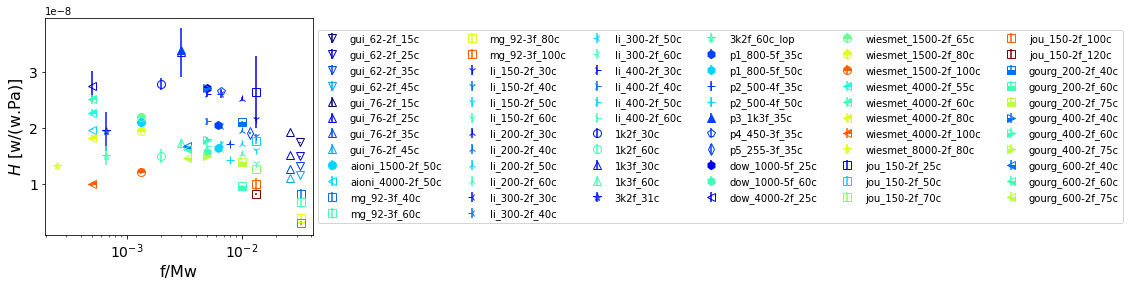

In [8]:
# computes and plots Henry's constant vs. functionality / molecular weight
reload(dataproc)
reload(plot)
ax = plot.henrys_const(d, csv_file_list, cmap, d_marker, 
                                   save_path=data_folder + 'henrys_const_by_wt_f_per_mw.pdf',
                                   by_wt=True, d_fill=d_fill)
ax.set_title('')

Increasing the functionality per molecular weight initially increases Henry's constant, as we expected. Eventually the trend reverses, coincidentally, around the maximum of our G-ADSA data (0.003) and the minimum of Yang et al. (2019) data (0.002).

**Note that we see polyols with different functionality and molecular weight lining up with each other when plotted as a function of functionality per molecular weight.**

### Henry's Constant by Molecular Weight: Visualizing Effect of Functionality

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covarianc

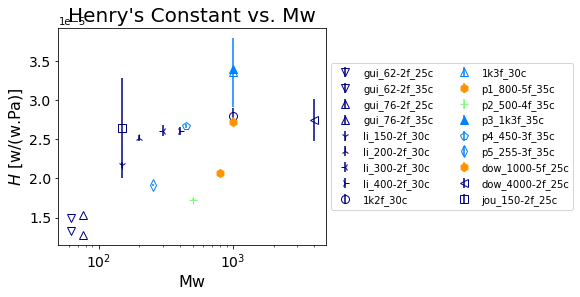

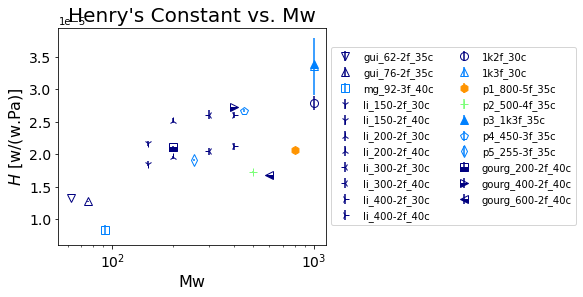

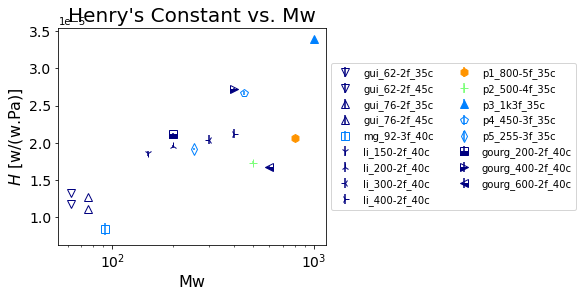

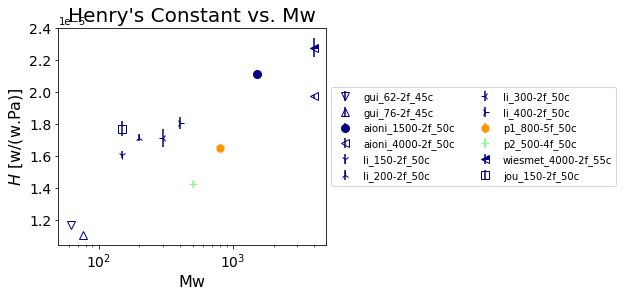

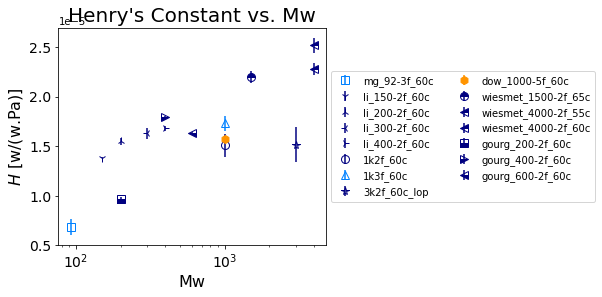

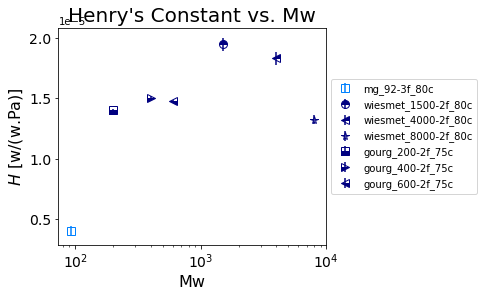

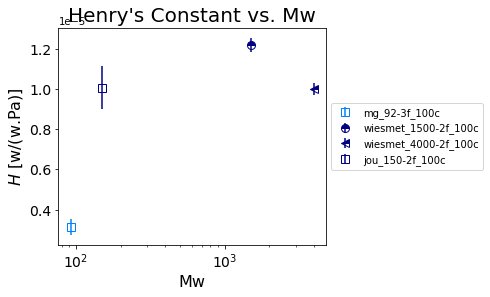

In [22]:
reload(dataproc)
reload(plot)

# computes and plots Henry's constant vs. functionality / molecular weight
T_list = [30, 35, 40, 50, 60, 80, 100]
for T in T_list:
    Ta = str(T-5) + 'c'
    Tb = str(T) + 'c'
    Tc = str(T+5) + 'c'
    file_list = [file for file in csv_file_list if (Ta in file) or (Tb in file) or (Tc in file)]
    ax = plot.henrys_const(d, file_list, cmap, d_marker, d_fill=d_fill,
                                       save_path=data_folder + 'henrys_const_by_wt_mw_f_{0:d}.pdf'.format(T),
                                      by_wt=True, x_label='Mw', color_var='f')

### Difunctional Polyols

Below we only consider difunctional (2f) polyols for a more exact comparison without the effects of branching or functionality.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),


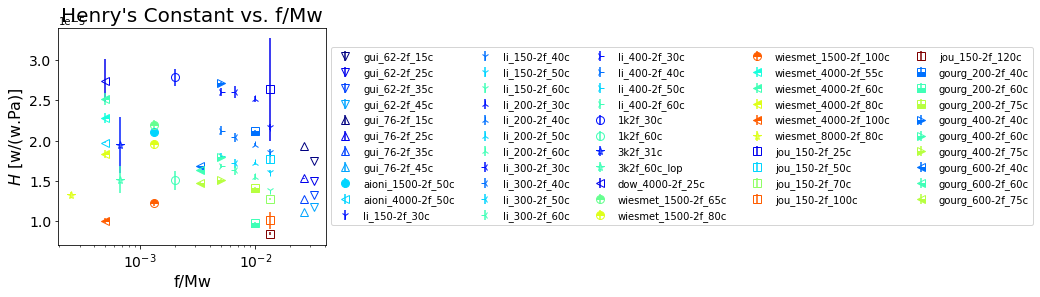

In [23]:
# csv data files
reload(dataproc)
csv_file_list = [csv_file for csv_file in csv_file_list if '2f' in csv_file]

# computes and plots Henry's constant vs. functionality / molecular weight
ax = plot.henrys_const(d, csv_file_list, cmap, d_marker,
                                   save_path=data_folder + 'henrys_const_by_wt_f_per_mw_2f.pdf',
                                  by_wt=True, d_fill=d_fill)

The results from Daneshvar et al. (1990) do not agree with the more recent results from Li et al. (2008), and do not appear to follow a smooth trend (see `plot_co2_solub.ipynb`). Same for Gourgouillon and Da Ponte (1999). I believe that the error in those measurements is high.

### Plot Difunctional Polyols as a Function of Molecular Weight

In the above plot, we have fixed the functionality to 2, so it essentially plots Henry's constant as a function of the inverse of the molecular weight. To make this clearer, we plot Henry's constant as a function of molecular weight itself.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),


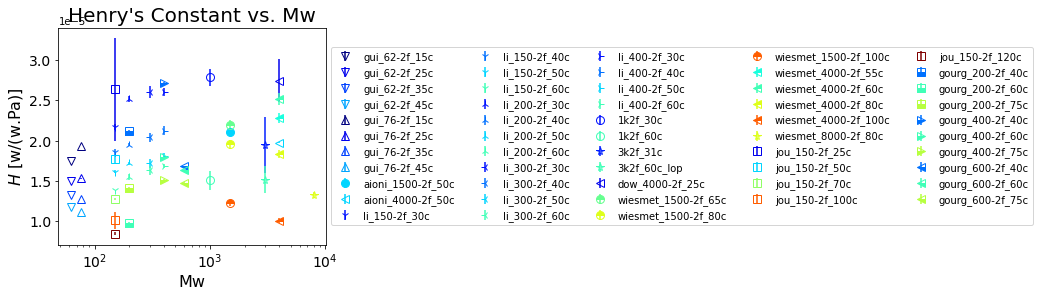

In [24]:
# computes and plots Henry's constant vs. functionality / molecular weight
ax = plot.henrys_const(d, csv_file_list, cmap, d_marker, d_fill=d_fill,
                                   save_path=data_folder + 'henrys_const_by_wt_mw_2f.pdf',
                                  by_wt=True, x_label='Mw')

It appears inconclusive whether the methyl group in PPG vs. PEG increases or decreases solubility based on comparison of EG and PG by Gui et al. (far left).

## Trifunctional Polyols

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


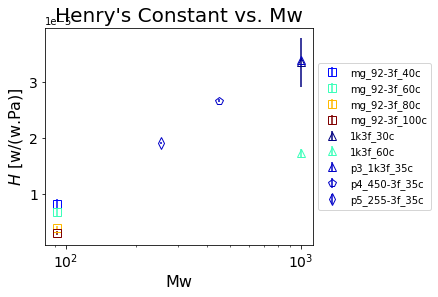

In [30]:
csv_file_list = ['mg_92-3f_40c', 'mg_92-3f_60c', 'mg_92-3f_80c', 'mg_92-3f_100c', 
                 '1k3f_30c', '1k3f_60c', 'p3_1k3f_35c', 'p4_450-3f_35c',
                 'p5_255-3f_35c']

# computes and plots Henry's constant vs. functionality / molecular weight
ax = plot.henrys_const(d, csv_file_list, cmap, d_marker, d_fill=d_fill,
                                   save_path=data_folder + 'henrys_const_by_wt_mw_2f.pdf',
                                  by_wt=True, x_label='Mw')

We currently do not have enough data to see the effect of molecular weight on the solubility at molecular weights larger than 1000 g/mol, which still behaves like a short-chain polyol with increasing solubility with molecular weight.

### Validate Henry's Constant

Plot the slope predicted by Henry's constant alongside CO2 solubility curve.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWar

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\plot.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Kornfield\ANALYSIS\g-adsa\plot.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C

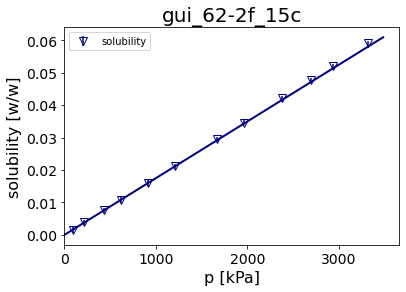

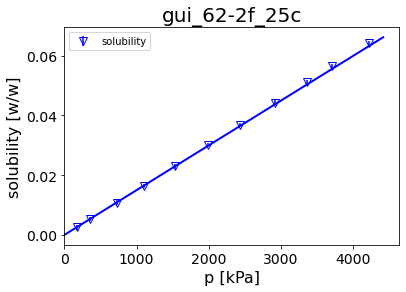

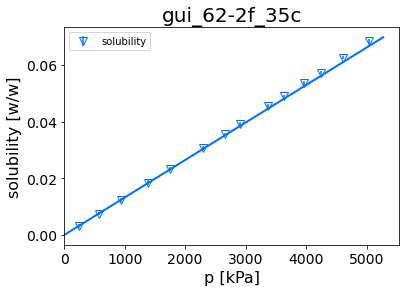

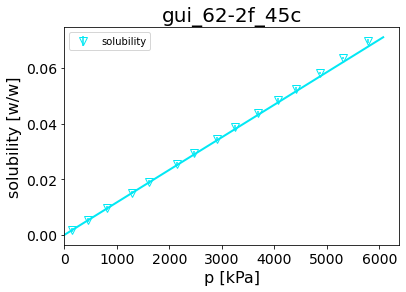

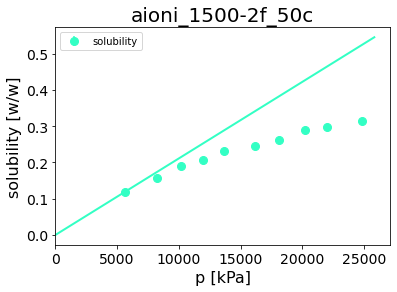

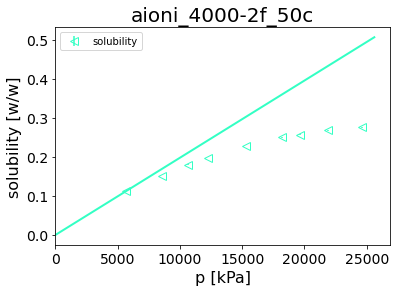

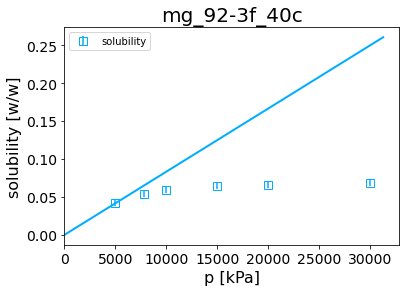

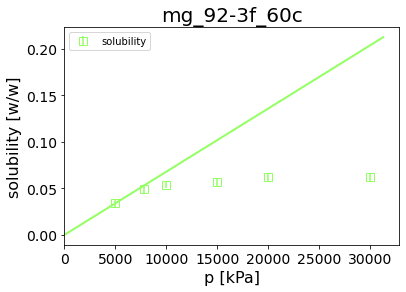

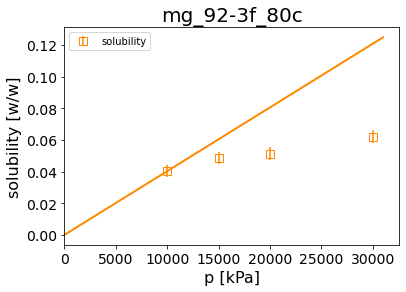

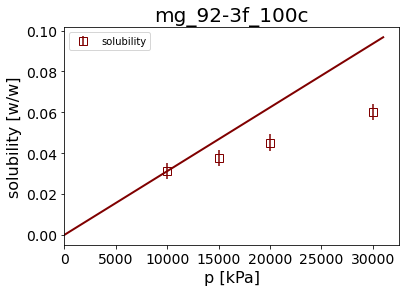

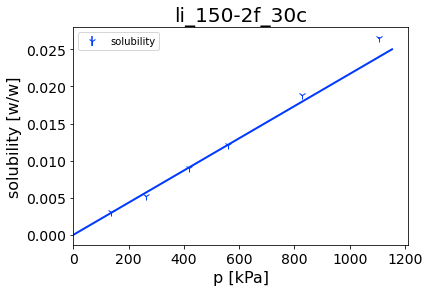

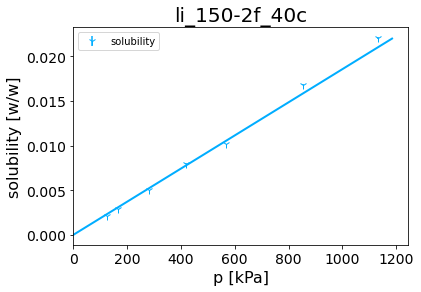

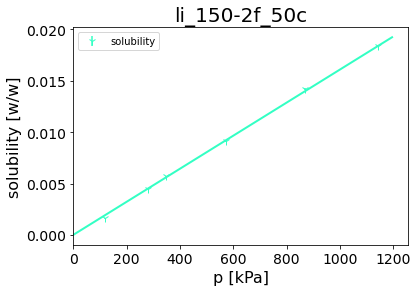

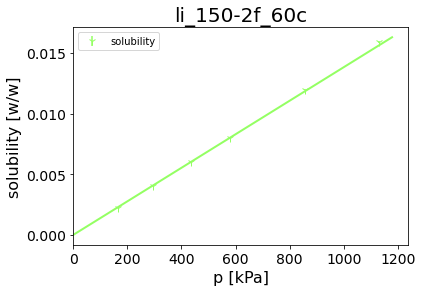

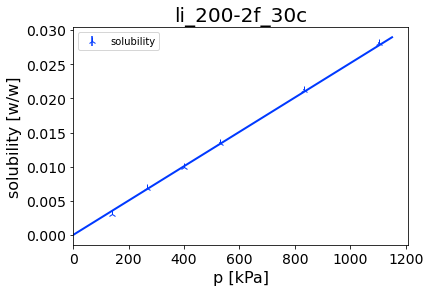

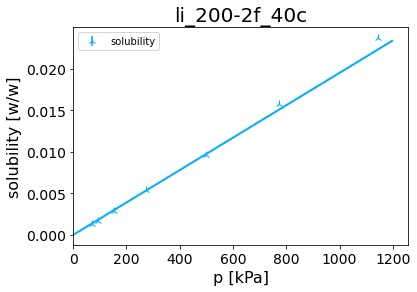

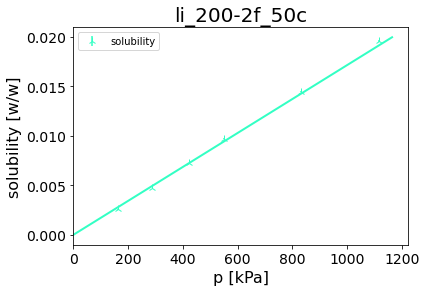

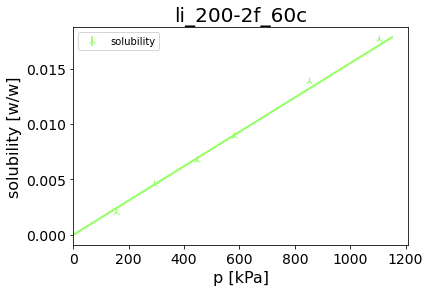

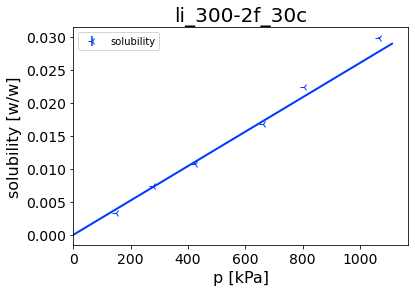

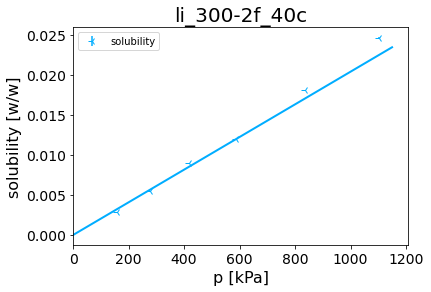

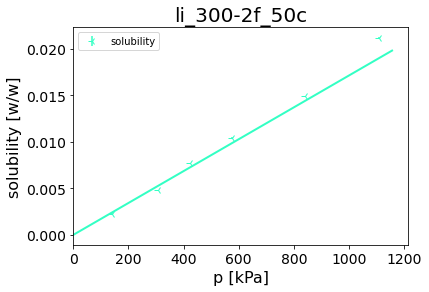

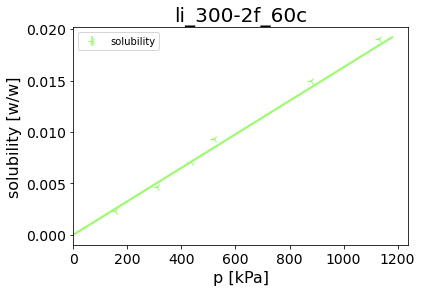

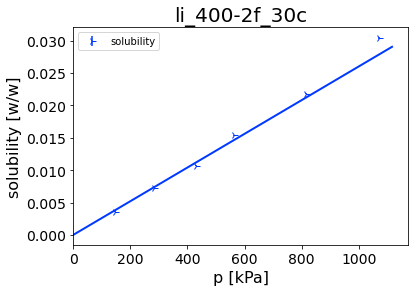

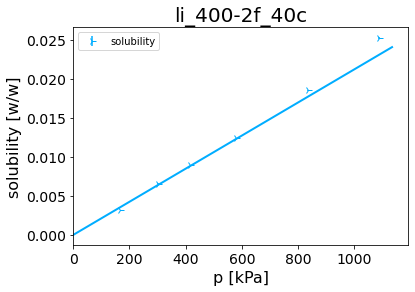

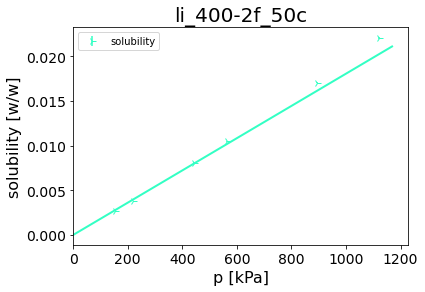

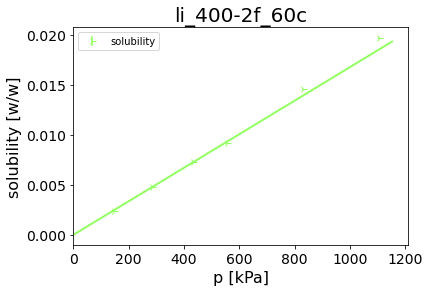

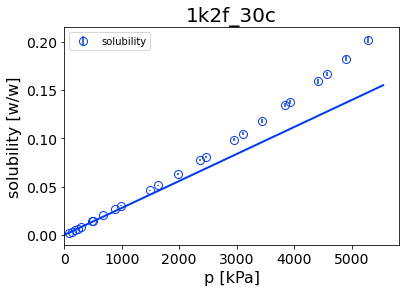

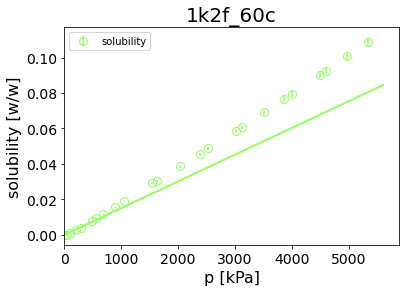

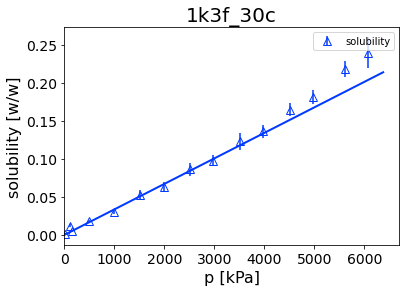

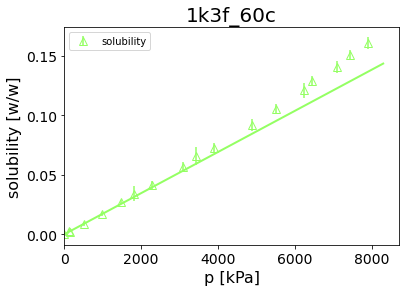

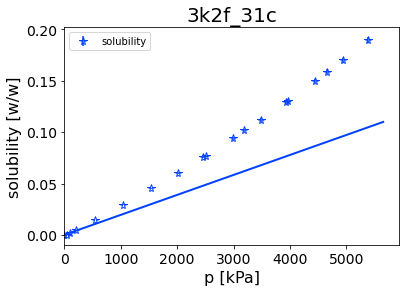

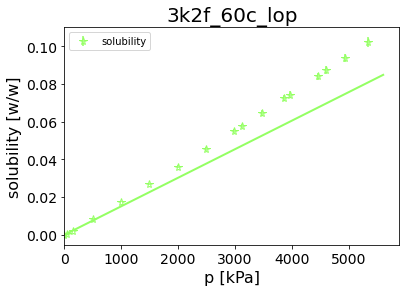

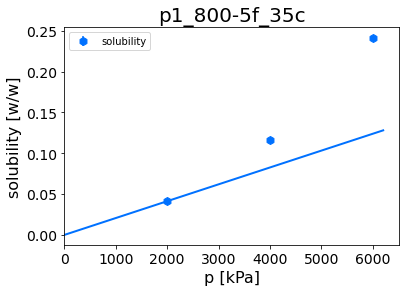

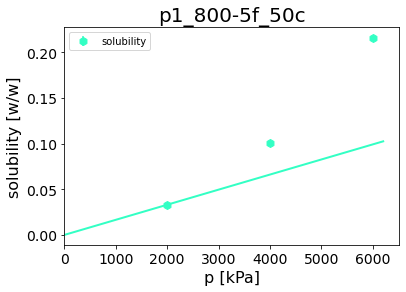

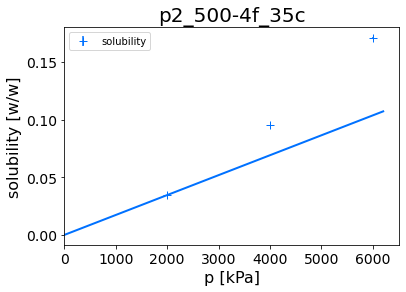

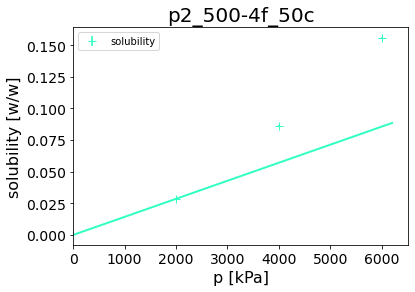

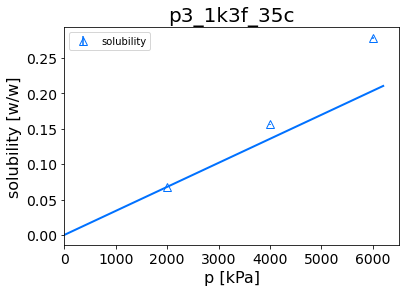

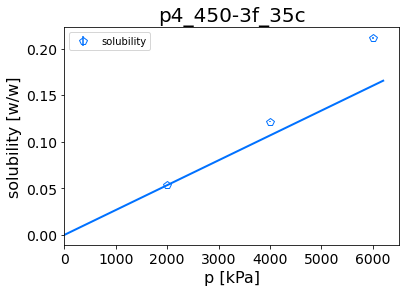

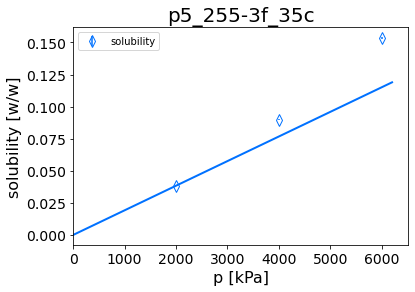

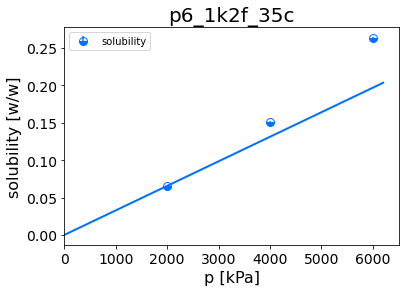

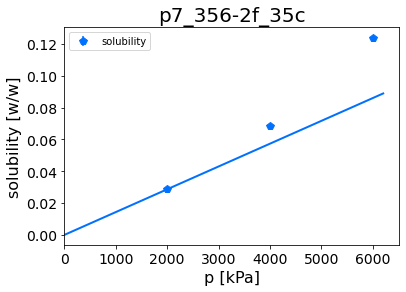

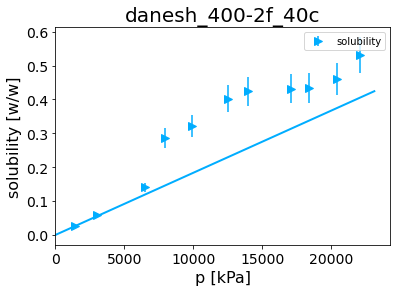

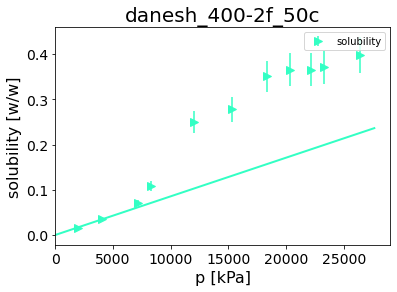

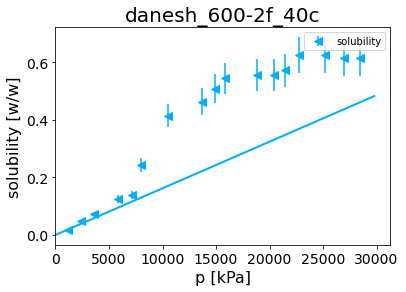

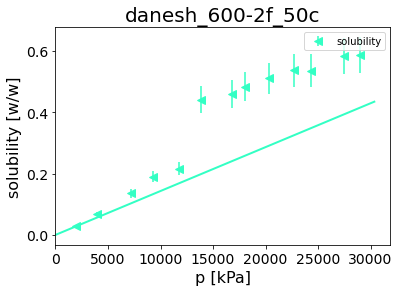

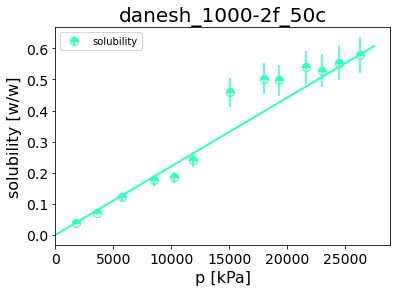

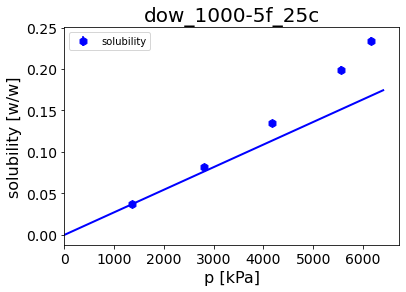

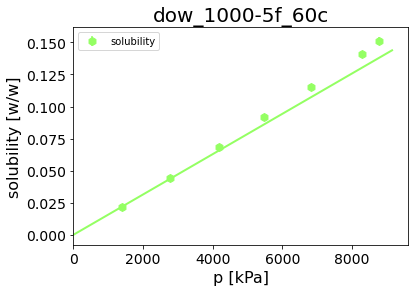

In [17]:
# conversion
kPa_2_Pa = 1000

# calculate limits of T in the list of files
T_list = [d[tag]['T'] for tag in csv_file_list]
T_min = np.min(T_list)
T_max = np.max(T_list)

# threshold pressure for calculate Henry's constant [kPa]
p_thresh_ideal = 1000
# plots solubility curves of all files
for i, tag in enumerate(csv_file_list):
    T = d[tag]['T']
    polyol = d[tag]['polyol']
    # plot solubility vs. p
    marker = d_marker[polyol]
    if polyol in d_fill:
        fillstyle = d_fill[polyol]
    else:
        fillstyle = 'none' 
    color = cmap((T - T_min)/(T_max - T_min))
    # plots solubility curve
    ax = plot.plot_errorbars(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], 
                                     label='solubility', color=color, xlabel='p [kPa]',
                                    ylabel='solubility [w/w]', title=tag,
                                    fillstyle=fillstyle, marker=marker)
    # plots prediction from Henry's constant
    # raises to the minimum pressure if it is higher than the prescribed ideal threshold 
    p_thresh = max(p_thresh_ideal, np.nanmin(d[tag]['p']))
    H, s_H = dataproc.compute_henrys_const(d[tag]['p'], 
                                       d[tag]['solub'], 
                                       d[tag]['spec_vol'], 
                                       p_thresh=p_thresh, 
                                      s_solub=d[tag]['s_solub'], 
                                      s_spec_vol=d[tag]['s_spec_vol'], 
                                      force_origin=True, 
                                      by_wt=True)
    p = np.array([0, ax.get_xlim()[1]])
    w = H*p*kPa_2_Pa
    ax.plot(p, w, '-', lw=2, color=color, label='Henry''s const')
    # formats plot
    ax.set_xlim([0, ax.get_xlim()[1]])